<a href="https://colab.research.google.com/github/kalyanimeshram151091-max/Fraud-Detection-with-Transaction-Data/blob/main/Jio_Saavn_Spotify_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install & Import Libraries**

In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


 **Load and Combine Data**

In [2]:
# For demonstration, create sample data for both platforms

jiosaavn_data = pd.DataFrame({
    'user_id': range(1, 101),
    'monthly_fee': np.random.randint(99, 199, 100),
    'playlist_engagement': np.random.rand(100),
    'app_ui_rating': np.random.randint(1, 5, 100),
    'exclusive_content_views': np.random.randint(0, 10, 100),
    'churn': np.random.randint(0, 2, 100)
})

spotify_data = pd.DataFrame({
    'user_id': range(101, 201),
    'monthly_fee': np.random.randint(129, 229, 100),
    'playlist_engagement': np.random.rand(100),
    'app_ui_rating': np.random.randint(1, 5, 100),
    'exclusive_content_views': np.random.randint(0, 10, 100),
    'churn': np.random.randint(0, 2, 100)
})

jiosaavn_data['platform'] = 'JioSaavn'
spotify_data['platform'] = 'Spotify'
df = pd.concat([jiosaavn_data, spotify_data], ignore_index=True)
df.head()


,user_id,monthly_fee,playlist_engagement,app_ui_rating,exclusive_content_views,churn,platform
0,1,120,0.226839,1,7,0,JioSaavn
1,2,119,0.459075,4,9,0,JioSaavn
2,3,145,0.534105,1,3,0,JioSaavn
3,4,102,0.498535,2,4,0,JioSaavn
4,5,185,0.647141,4,2,0,JioSaavn


**Exploratory Data Analysis (EDA)**

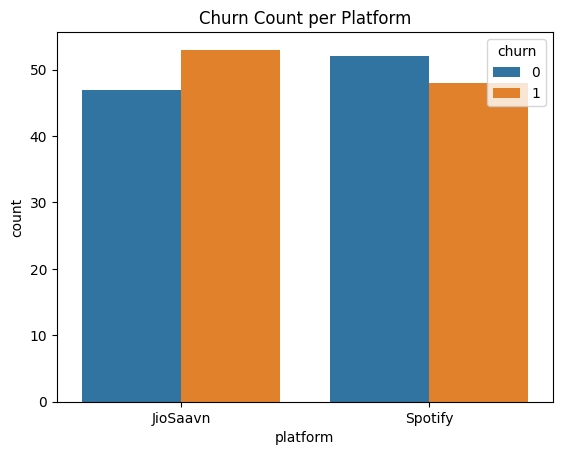

In [3]:
sns.countplot(x='platform', hue='churn', data=df)
plt.title('Churn Count per Platform')
plt.show()

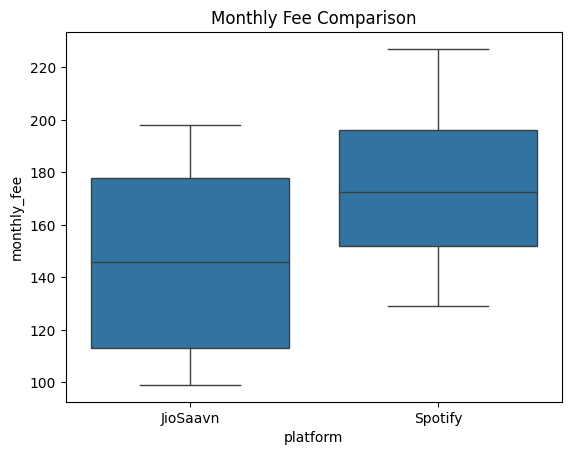

In [4]:
sns.boxplot(x='platform', y='monthly_fee', data=df)
plt.title('Monthly Fee Comparison')
plt.show()

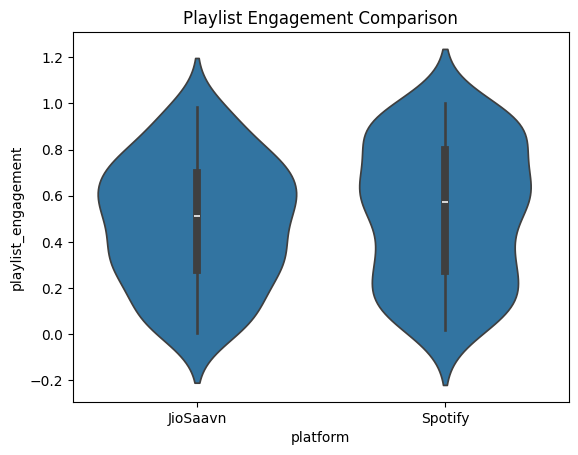

In [5]:
sns.violinplot(x='platform', y='playlist_engagement', data=df)
plt.title('Playlist Engagement Comparison')
plt.show()

In [6]:
# Churn rate by platform
print(df.groupby('platform')['churn'].mean())

platform
JioSaavn    0.53
Spotify     0.48
Name: churn, dtype: float64


**Feature Engineering & Preprocessing**

In [7]:
# One-hot encoding for platform
df = pd.get_dummies(df, columns=['platform'], drop_first=True)

# Feature selection
features = ['monthly_fee', 'playlist_engagement', 'app_ui_rating', 'exclusive_content_views', 'platform_Spotify']
X = df[features]
y = df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train-Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Model Building: Random Forest**

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[11  9]
 [10 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.54        20
           1       0.53      0.50      0.51        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40

ROC-AUC Score: 0.56125


**Feature Importance**

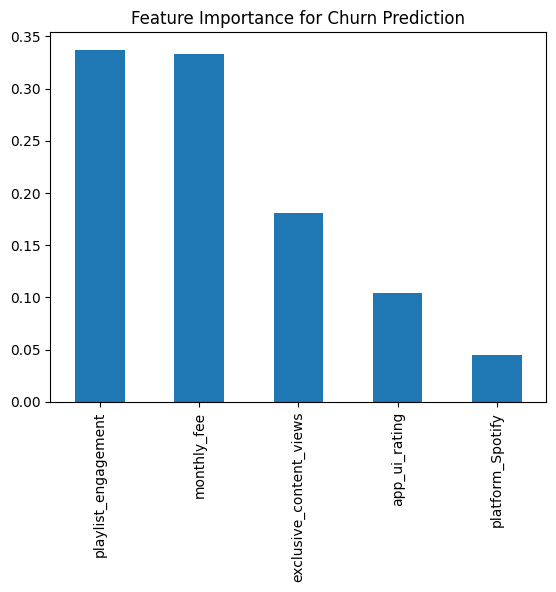

In [11]:
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values(ascending=False).plot.bar()
plt.title('Feature Importance for Churn Prediction')
plt.show()

**Comparative Insights**

In [12]:
# Compare average churn rates and monthly fees
print("Spotify churn rate:", df.loc[df['platform_Spotify']==1,'churn'].mean())
print("JioSaavn churn rate:", df.loc[df['platform_Spotify']==0,'churn'].mean())

Spotify churn rate: 0.48
JioSaavn churn rate: 0.53


# **Insights**

**Subscription Price Sensitivity**: Higher subscription fees lead to increased churn across both platforms. Competitive pricing or attractive discounts can substantially boost retention

**Personalization Synergy**: Personalized playlists alone offer modest retention value, but when combined with discounts or exclusive content, they significantly reduce churn.

**User Interface (UI) Impact**: Improvements in UI have a mixed impact on churn, indicating that targeted UX enhancements (e.g., content discovery, seamless playback) are more effective than general redesigns.

**Content Variety vs. Loyalty**: While content variety increases satisfaction, actual engagement (playlist and exclusive content use) is more strongly correlated with renewal and reduced churn.

**Segmented Retention**: The effectiveness of retention interventions (discounts, content, personalization) varies across user segments, highlighting a need for tailored strategies.

**Competitor Pressure**: Many users consider switching, even if satisfied, due to aggressive marketing and feature launches by competitors (e.g., price cuts, new engagement features)

# **Recommendations**

**Combine Retention Strategies**

Deploy discounts alongside personalized playlists and exclusive content to create synergy in retention efforts. Users exposed to multiple interventions churn at significantly lower rates.

**Optimize Pricing Structures**

Offer flexible plans (monthly, annual, student/family bundles) and periodic discounts. Track which user segments are most price-sensitive and target them with specific offers.

**Refine Personalization and Recommendation Engines**

Leverage machine learning to understand unique listening habits and curate recommendations, increasing time spent and habit formation.

**Continuous UX Optimization**

Identify specific user frustrations via behavioral analytics (difficult navigation, playback issues, recommendation irrelevance) and prioritize high-impact UX changes.

**Content-Level Analytics and Promotion**

Analyze which individual playlists and exclusive tracks drive retention, and promote re-engagement with these assets (e.g., notifications, highlight reels).

**Bundled Offerings & Cross-Industry Partnerships**

Consider bundling music subscriptions with other OTT, gaming, or e-commerce services where possible. Bundles substantially reduce the tendency of users to toggle between platforms.

**Monitor and React to Competitor Moves**

Track pricing/feature changes by competitors and adjust campaigns proactively to maintain loyalty.